In [ ]:
from google.colab import  drive
drive.mount ("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install nibabel --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nibabel as nib
import nibabel.processing
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
Head_MR = nib.load("/content/drive/MyDrive/Nifti/MRHead.nii.gz")

In [ ]:
Head_MR_data = Head_MR.get_fdata()

In [ ]:
affine = Head_MR.affine
shape = Head_MR.shape

In [ ]:
print(affine)

[[  0.           0.           1.29999542 -86.64489746]
 [ -1.           0.           0.         133.92860413]
 [  0.          -1.           0.         116.78569794]
 [  0.           0.           0.           1.        ]]


In [ ]:
shape

(256, 256, 130)

In [ ]:
Head_MR.header.get_zooms()

(1.0, 1.0, 1.2999954)

In [ ]:
nib.aff2axcodes(affine)

('P', 'I', 'R')

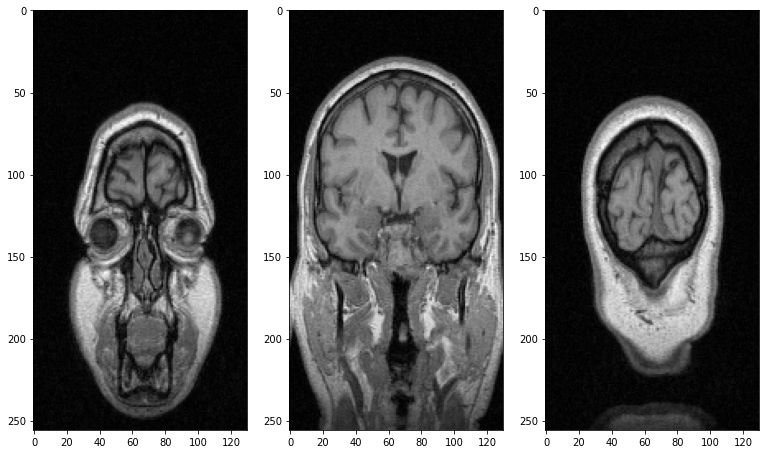

In [ ]:
fig , axis = plt.subplots(1,3,figsize=(13,13))
axis[0].imshow(Head_MR_data[50,:,: ], cmap="gray")
axis[1].imshow(Head_MR_data[120,:,:] , cmap="gray")
axis[2].imshow(Head_MR_data[220,:,: ], cmap="gray")


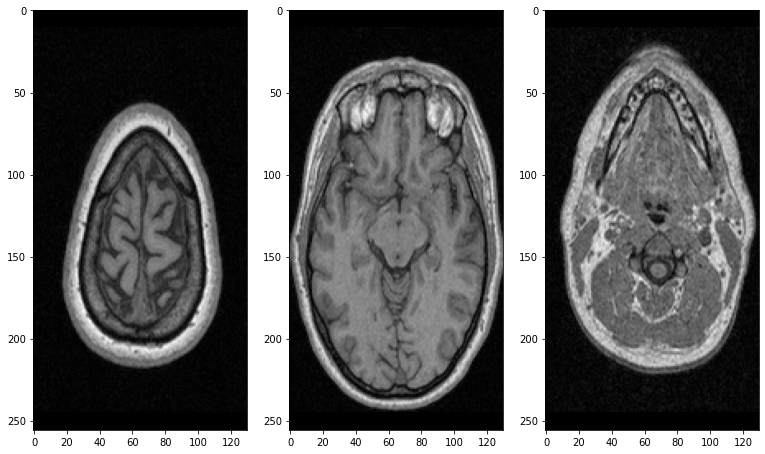

In [ ]:
fig , axis = plt.subplots(1,3,figsize=(13,13))
axis[0].imshow(Head_MR_data[:,50,: ], cmap="gray")
axis[1].imshow(Head_MR_data[:,120,:] , cmap="gray")
axis[2].imshow(Head_MR_data[:,220,: ], cmap="gray")

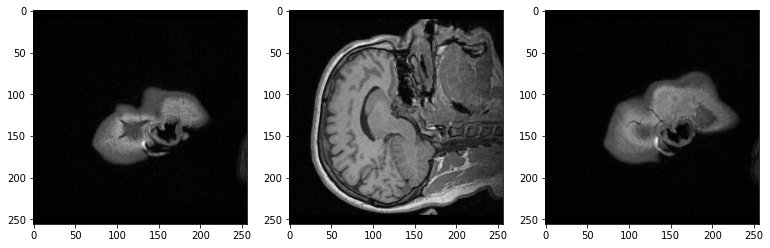

In [ ]:
fig , axis = plt.subplots(1,3,figsize=(13,13))
axis[0].imshow(Head_MR_data[:,:,6 ], cmap="gray")
axis[1].imshow(Head_MR_data[:,:,75] , cmap="gray")
axis[2].imshow(Head_MR_data[:,:,125 ], cmap="gray")

In [ ]:
voxel_coords = np.array((0,0,0,1))
physical_coords = affine @ voxel_coords

In [ ]:
physical_coords

array([-86.64489746, 133.92860413, 116.78569794,   1.        ])

In [ ]:
affine [: , 3:]

array([[-86.64489746],
       [133.92860413],
       [116.78569794],
       [  1.        ]])

In [ ]:
voxel_coords_manual = np.array((0,0,0))
physical_coords_manual = affine[:3, :3] @ voxel_coords_manual
physical_coords_manual += affine[:3 , 3]
physical_coords_manual


array([-86.64489746, 133.92860413, 116.78569794])

In [ ]:
physical_coords = [-86.64489746, 133.92860413, 116.78569794,   1.        ]
(np.linalg.inv(affine) @ physical_coords ).round()

array([-0., -0.,  0.,  1.])

In [ ]:
voxel_size = (2,2,2)
Head_MR_resized = nibabel.processing.conform(Head_MR , (128,128,65),voxel_size , orientation="PIR")
Head_MR_resized_data = Head_MR_resized.get_fdata()

In [ ]:
print(Head_MR_resized.shape)

(128, 128, 65)


In [ ]:
print(Head_MR_resized.header.get_zooms())

(2.0, 2.0, 2.0)


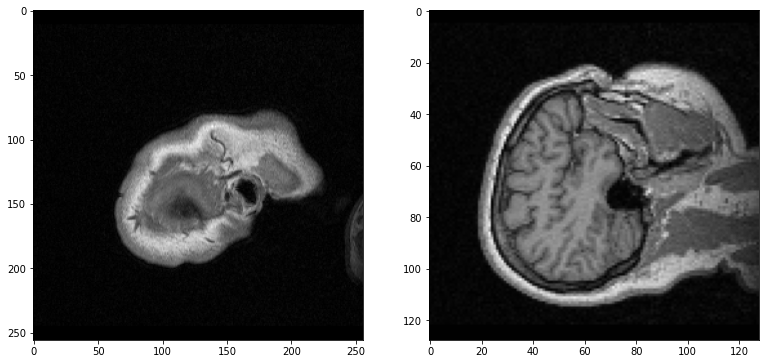

In [ ]:
fig,axis = plt.subplots(1,2,figsize=(13,13))
axis[0].imshow(Head_MR_data[:,:,10], cmap = 'gray')
axis[1].imshow(Head_MR_resized_data[:,:,10], cmap = 'gray')


In [ ]:
Head_MR_data_standard = Head_MR_data/3071

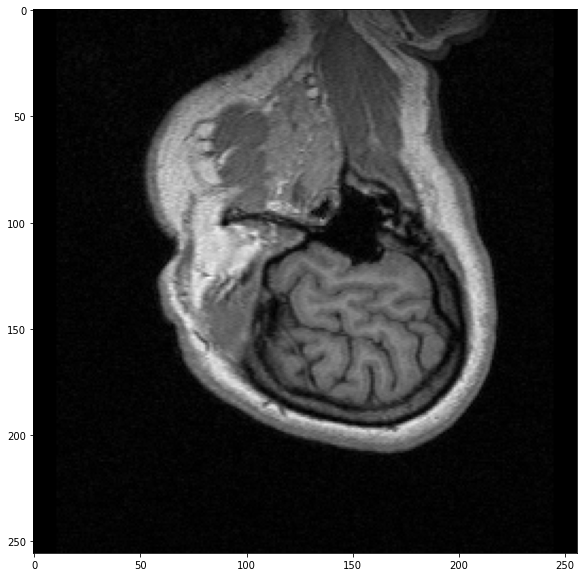

In [ ]:
plt.figure(figsize = (10,10))
plt.imshow(np.rot90(Head_MR_data_standard[:,:,20]) , cmap = 'gray')

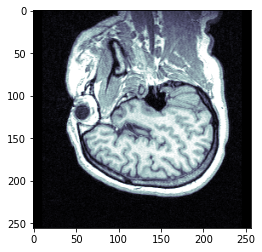

In [ ]:
Head_MR_window = np.clip(Head_MR_data , 0,100)
plt.figure()
plt.imshow(np.rot90(Head_MR_window[:,:,100]),cmap = "bone")

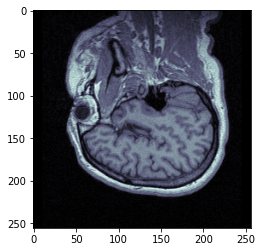

In [ ]:
Head_MR_window = np.clip(Head_MR_data , 0,300)
plt.figure()
plt.imshow(np.rot90(Head_MR_window[:,:,100]),cmap = "bone")

In [ ]:
mean , std = np.mean(Head_MR_data) , np.std(Head_MR_data)
Head_MR_data_norm = (Head_MR_data - mean)/std
Head_MR_data_standardized = (Head_MR_data_norm - np.min(Head_MR_data_norm))/(np.max(Head_MR_data_norm)-np.min(Head_MR_data_norm))


In [ ]:
np.mean(Head_MR_data) , np.max(Head_MR_data) , np.min(Head_MR_data)

(33.69384178748498, 279.0, 0.0)

In [ ]:
np.mean(Head_MR_data_standardized) , np.max(Head_MR_data_standardized) , np.min(Head_MR_data_standardized)

(0.12076645801965935, 1.0, 0.0)